# Global Economy Indicators Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path=r"C:\Users\admin\Desktop\data\Global Economy Indicators.csv"
df= pd.read_csv(path, low_memory=False)
# Clean column names
df.columns = df.columns.str.strip()

# Rename for convenience
df.rename(columns={
     'Gross Domestic Product (GDP)': 'GDP',
    'Per capita GNI': 'GNI_per_capita',
    'Household consumption expenditure (including Non-profit institutions serving households)': 'Household_expenditure',
    'Imports of goods and services': 'Imports',
    'Exports of goods and services': 'Exports',
    'Country': 'Country',
}, inplace=True)

df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,GNI_per_capita,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household_expenditure,Imports,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


## Top 5 Countries by Average GDP

In [3]:
top5_avg_gdp = df.groupby('Country')['GDP'].mean().sort_values(ascending=False).head(5)
top5_avg_gdp

Country
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name: GDP, dtype: float64

## Countries with Household Consumption Expenditure in the Most Recent Year

In [4]:
most_recent_year = df['Year'].max()
household_expenditure_recent = df[df['Year'] == most_recent_year][['Country', 'Household_expenditure']].dropna()
household_expenditure_recent.head()

,Country,Household_expenditure
51,Afghanistan,1.386407e+10
103,Albania,1.371718e+10
155,Algeria,7.254484e+10
207,Andorra,1.869856e+09
259,Angola,3.049319e+10


## Grouped Statistics by Country

In [5]:
grouped = df.groupby('Country').agg({
    'GNI_per_capita': 'mean',
    'Imports': 'max',
    'Exports': 'sum'
}).rename(columns={
    'GNI_per_capita': 'Mean_GNI_per_capita',
    'Imports': 'Max_Imports',
    'Exports': 'Total_Exports'
}).sort_values(by='Total_Exports', ascending=False)
grouped.head(10)

,Mean_GNI_per_capita,Max_Imports,Total_Exports
Country,,,
United States,32119.442308,3.400000e+12,5.313078e+13
Germany,26160.307692,1.780000e+12,3.895194e+13
China,2461.269231,3.060000e+12,3.887656e+13
Japan,27760.807692,1.010000e+12,2.353011e+13
United Kingdom,24718.230769,9.430000e+11,2.134007e+13
France,24605.673077,9.290000e+11,2.081512e+13
Netherlands,28152.057692,7.370000e+11,1.642795e+13
Italy,20549.250000,6.630000e+11,1.582017e+13
Canada,25401.269231,6.090000e+11,1.384602e+13


## Plot: Top 5 Countries by Average GDP

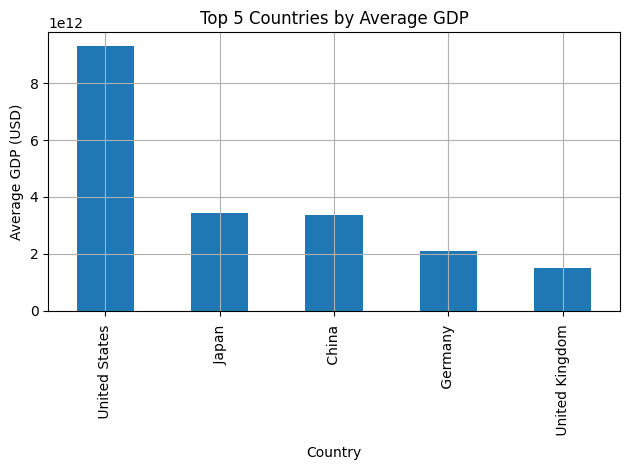

In [6]:
top5_avg_gdp.plot(kind='bar', title='Top 5 Countries by Average GDP')
plt.ylabel('Average GDP (USD)')
plt.xlabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

## Plot: Top 10 Countries by Total Exports

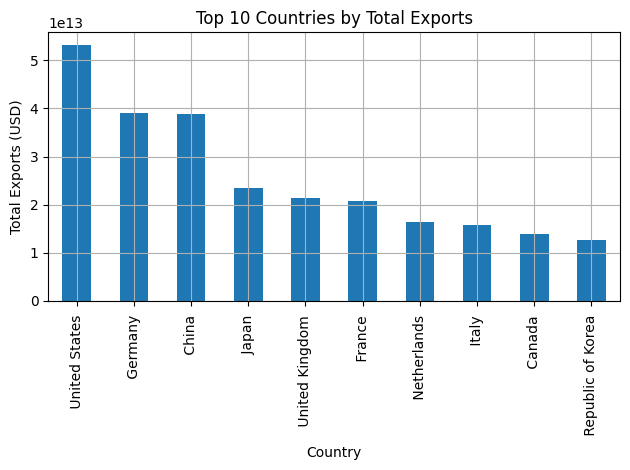

In [7]:
grouped['Total_Exports'].head(10).plot(kind='bar', title='Top 10 Countries by Total Exports')
plt.ylabel('Total Exports (USD)')
plt.xlabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()